# WEEK 1

## Installation of Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings 
filterwarnings('ignore') 

## Loading The DataFrame

In [2]:
df = pd.read_csv("/kaggle/input/aqi-datasets/air quality data.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


### Showing The Shape of The DataFrame

In [3]:
df.shape

(29531, 16)

### Finding The Information About The DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### Finding if there has any duplicate value or not

In [5]:
df.duplicated().sum()

0

### Finding the number of Null values in descending order

In [6]:
df.isnull().sum().sort_values(ascending =False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

### Drop the rows where AQI has missing values

In [7]:
df.dropna(subset=['AQI'],inplace = True)

In [8]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

### Finding the percent of null values present in the data

In [9]:
Null_Percent = ((df.isnull().sum()/df.isnull().count()) *100).sort_values(ascending=False)
Null_Percent

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

### Describing the details about the data

## Key Condideration

#### Xylene has highest misssing values 61.86%
#### PM10 has 2nd highest misssing values 28.52%
#### NH3 has 3rd highest misssing values 26.30%
#### Toluene has 4th highest misssing values 23.44%
#### Benzene has 5th highest misssing values 14.23%

In [10]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


# WEEK 2: Visualization 

## Univariate Analysis
### Histogram Analysis

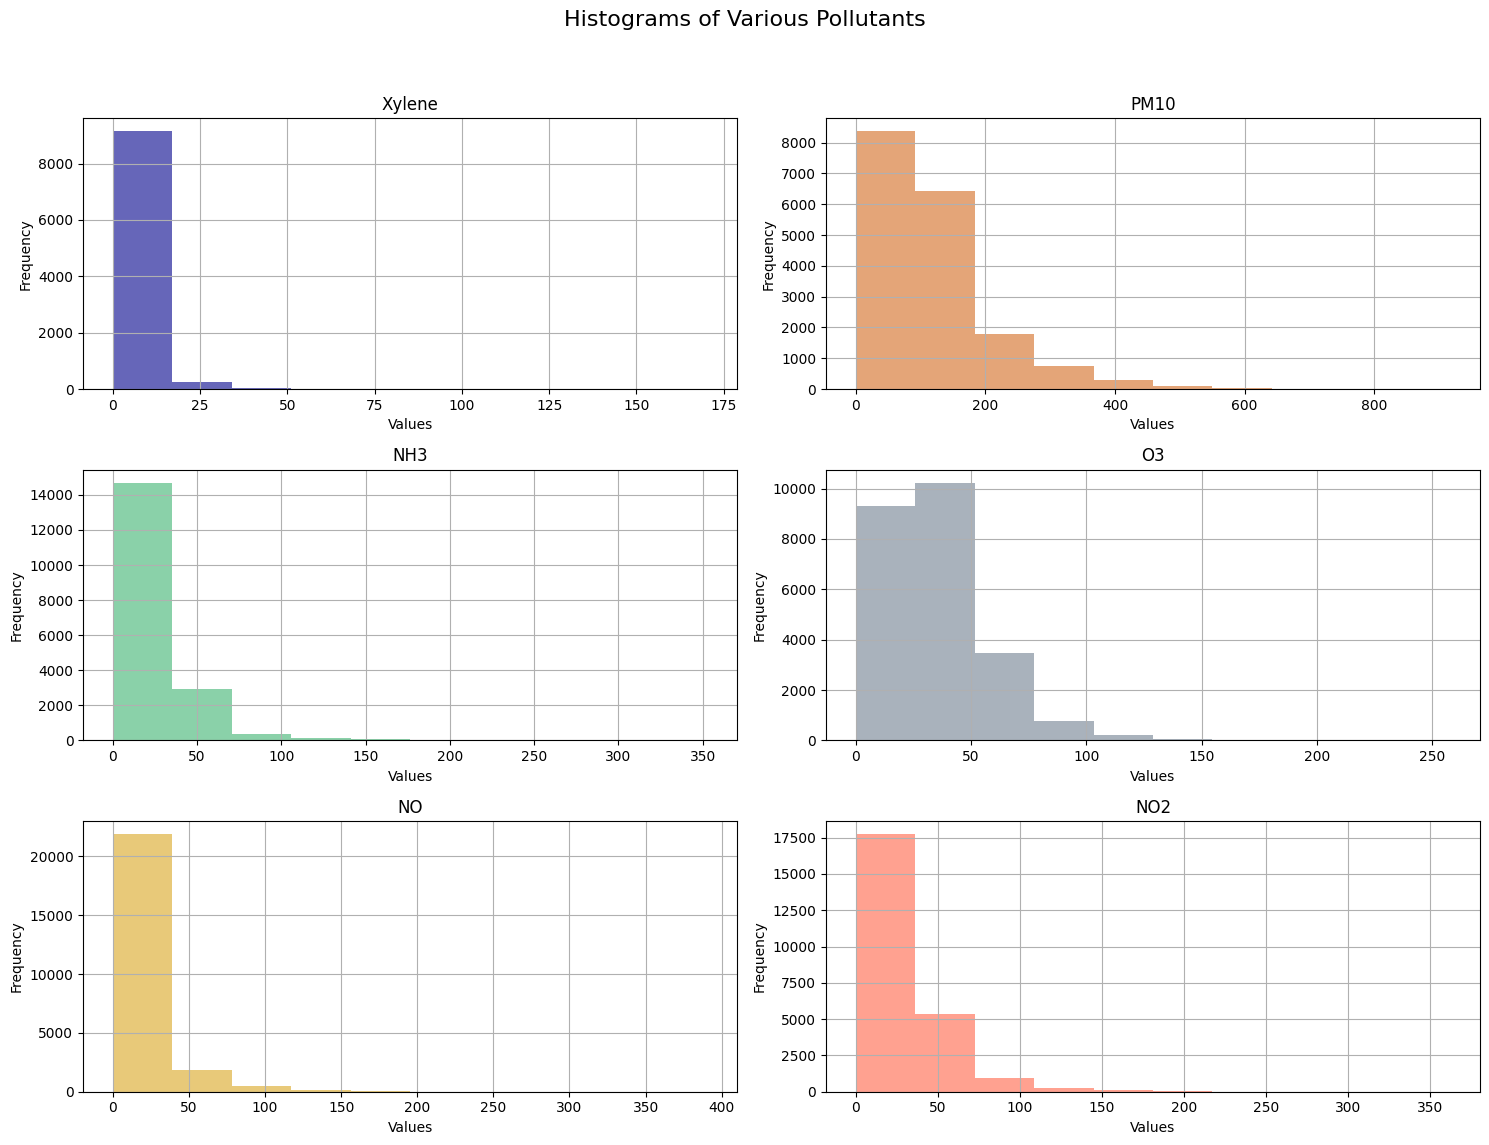

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))  
fig.suptitle('Histograms of Various Pollutants', fontsize=16)  

 
columns = ['Xylene', 'PM10', 'NH3', 'O3','NO', 'NO2']  
titles = ['Xylene', 'PM10', 'NH3', 'O3','NO', 'NO2']
colors = ['DarkBlue', 'Chocolate', 'MediumSeaGreen', 'SlateGray', 'GoldenRod', 'Tomato']

# Flatten the axs array for easier iteration  
axs = axs.flatten()  

# Iterate through the columns and plot each one  
for idx, column in enumerate(columns):  
    axs[idx].hist(df[column], bins=10, alpha=0.6,color=colors[idx])  
    axs[idx].set_title(titles[idx])  
    axs[idx].set_xlabel('Values')  
    axs[idx].set_ylabel('Frequency')  
    axs[idx].grid(True)  

# Hide any unused subplots (if there are any)  
for ax in axs[len(columns):]:  
    ax.axis('off')  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title  
plt.show()  

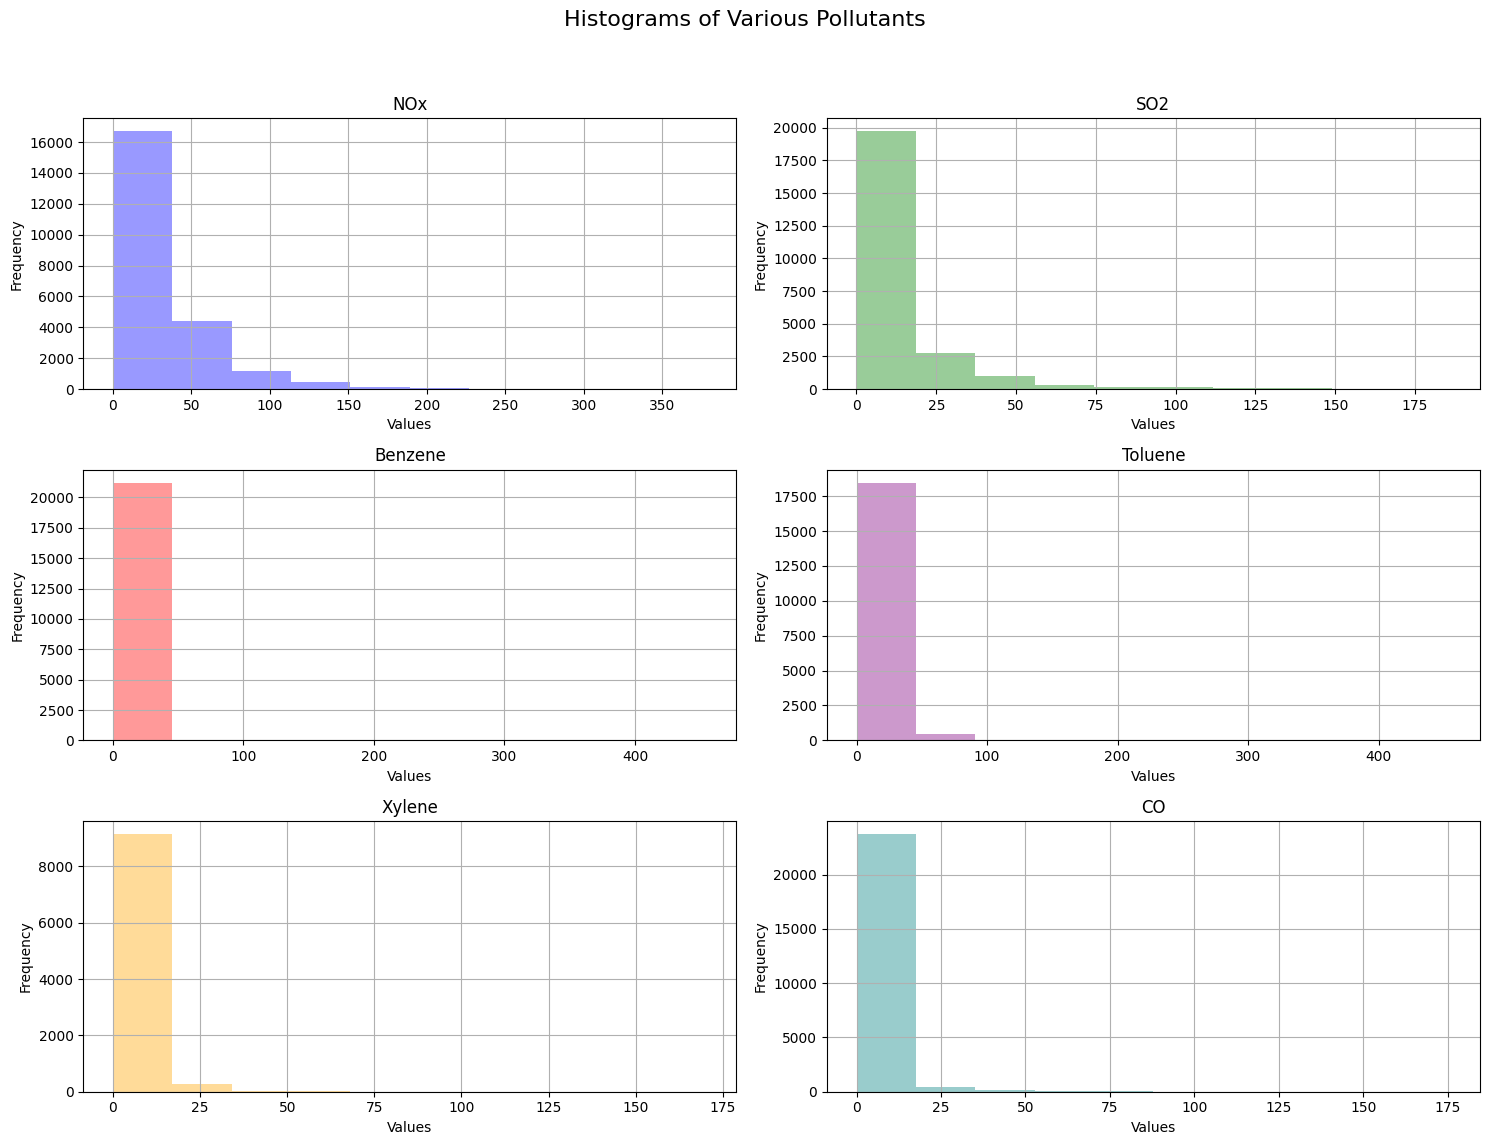

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))  
fig.suptitle('Histograms of Various Pollutants', fontsize=16)  

 
columns = [ 'NOx', 'SO2','Benzene','Toluene','Xylene','CO']
titles = [ 'NOx', 'SO2','Benzene','Toluene','Xylene','CO']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'teal']

# Flatten the axs array for easier iteration  
axs = axs.flatten()  

# Iterate through the columns and plot each one  
for idx, column in enumerate(columns):  
    axs[idx].hist(df[column], bins=10, alpha=0.4,color=colors[idx])  
    axs[idx].set_title(titles[idx])  
    axs[idx].set_xlabel('Values')  
    axs[idx].set_ylabel('Frequency')  
    axs[idx].grid(True)  

# Hide any unused subplots (if there are any)  
for ax in axs[len(columns):]:  
    ax.axis('off')  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title  
plt.show()  

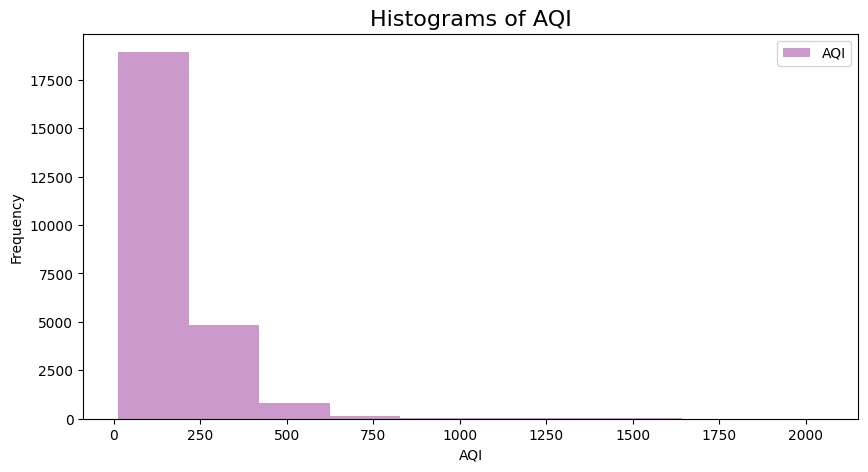

In [14]:
plt.title('Histograms of AQI', fontsize=16)    
df['AQI'].plot(kind='hist', color='purple', alpha=0.4, figsize=(10, 5))  
 
plt.xlabel('AQI')  
plt.legend(['AQI'])   
plt.show()  

## Area Graph Analysis

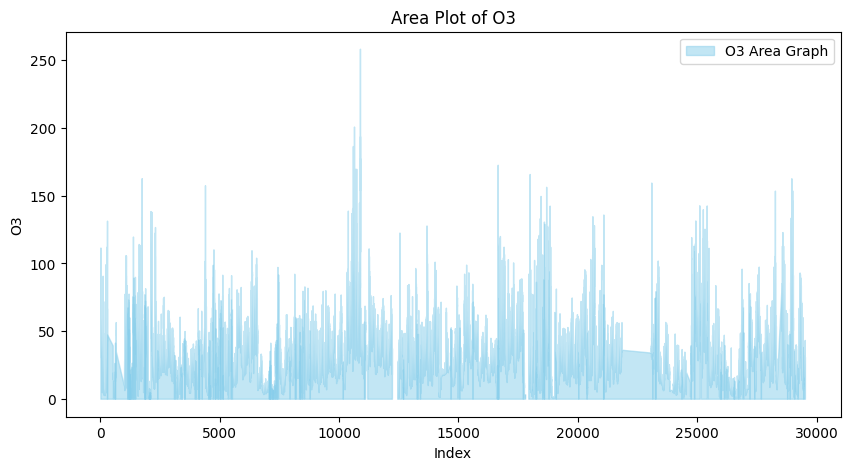

In [15]:
plt.figure(figsize=(10, 5))   
plt.fill_between(df.index, df['O3'], color="skyblue", alpha=0.5)  
plt.title("Area Plot of O3")  
plt.xlabel("Index")  
plt.ylabel("O3")  
plt.legend(['O3 Area Graph'])  
plt.show()  

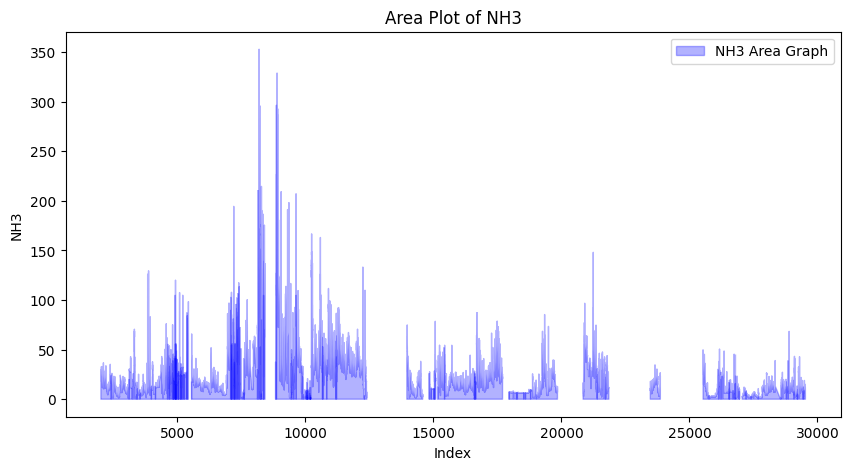

In [16]:
plt.figure(figsize=(10,5))
plt.title('Area Plot of NH3')
plt.fill_between(df.index, df['NH3'], color="blue", alpha=0.3)
plt.xlabel("Index")
plt.ylabel("NH3")
plt.legend(['NH3 Area Graph'])
plt.show()

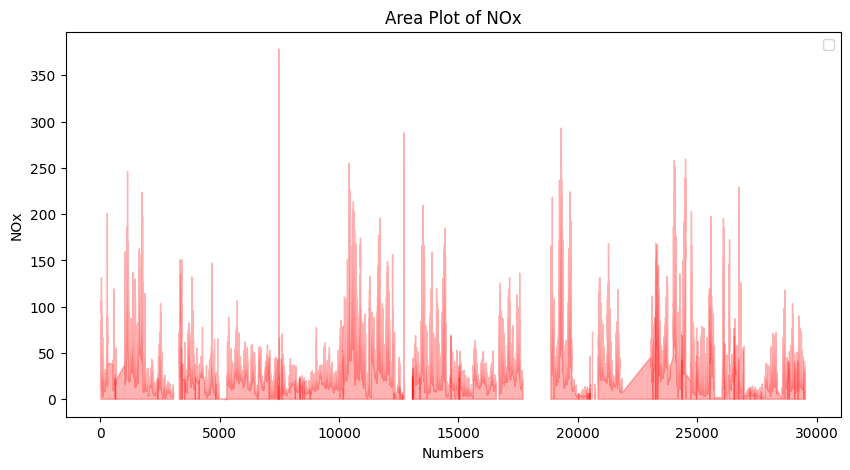

In [17]:
plt.figure(figsize=(10,5))
plt.title("Area Plot of NOx")
plt.fill_between(df.index, df['NOx'],color='red',alpha=0.3)
plt.xlabel('Numbers')
plt.ylabel('NOx')
plt.legend()
plt.show()

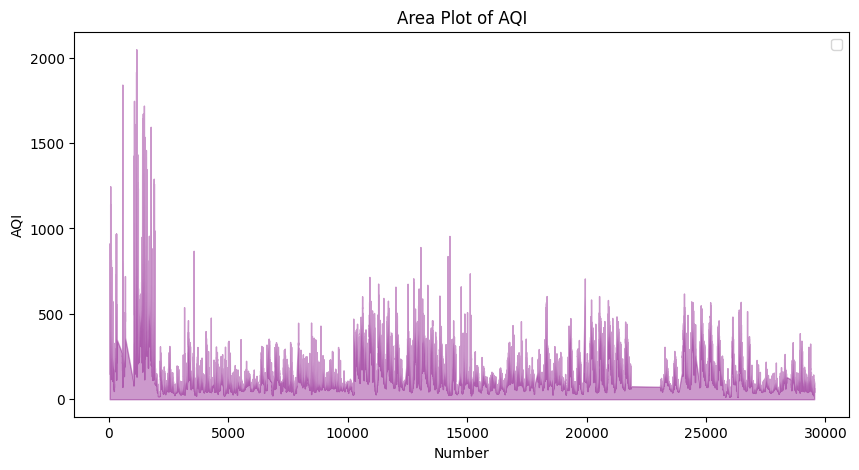

In [18]:
plt.figure(figsize=(10,5))
plt.title("Area Plot of AQI")
plt.fill_between(df.index,df['AQI'],color='purple',alpha=0.4)
plt.xlabel('Number')
plt.ylabel('AQI')
plt.legend()
plt.show()

## Distribution Analysis 

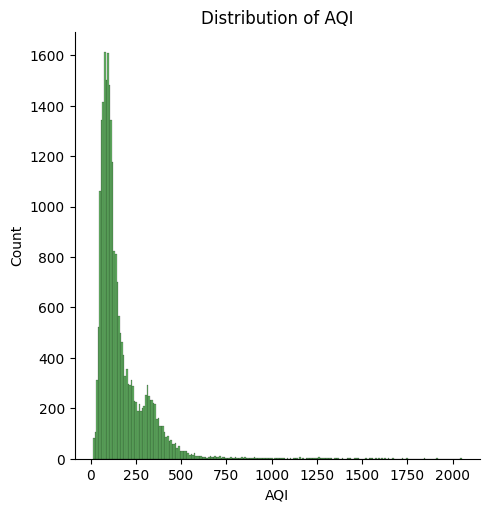

In [19]:

sns.displot(df,x='AQI',color='green',alpha =0.6)
plt.title("Distribution of AQI")
plt.show()

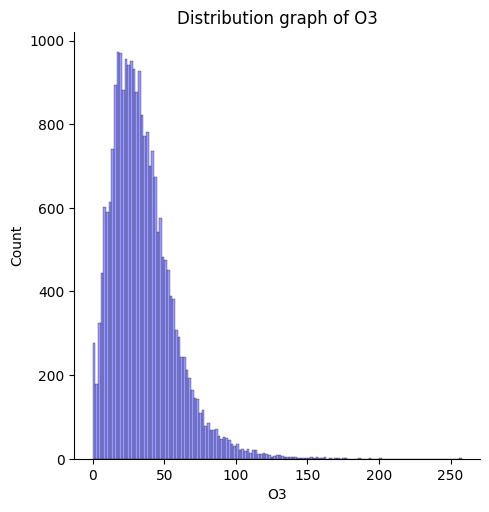

In [20]:
sns.displot(df,x='O3',color='blue',alpha=0.4)
plt.title('Distribution graph of O3')
plt.show()

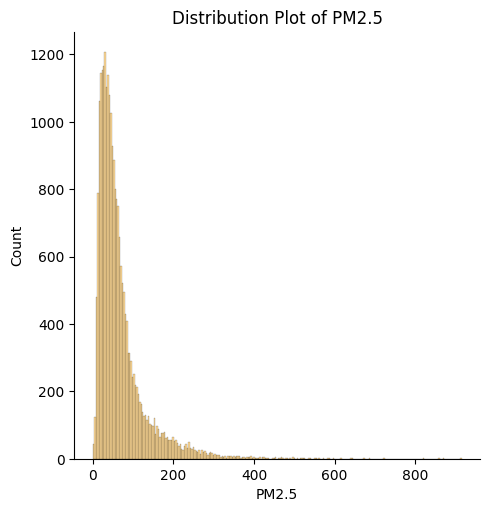

In [21]:
sns.displot(df,x='PM2.5',color='orange',alpha=0.4)
plt.title('Distribution Plot of PM2.5')
plt.show()

### Bivariate Analysis

## Cat Plot Analysis

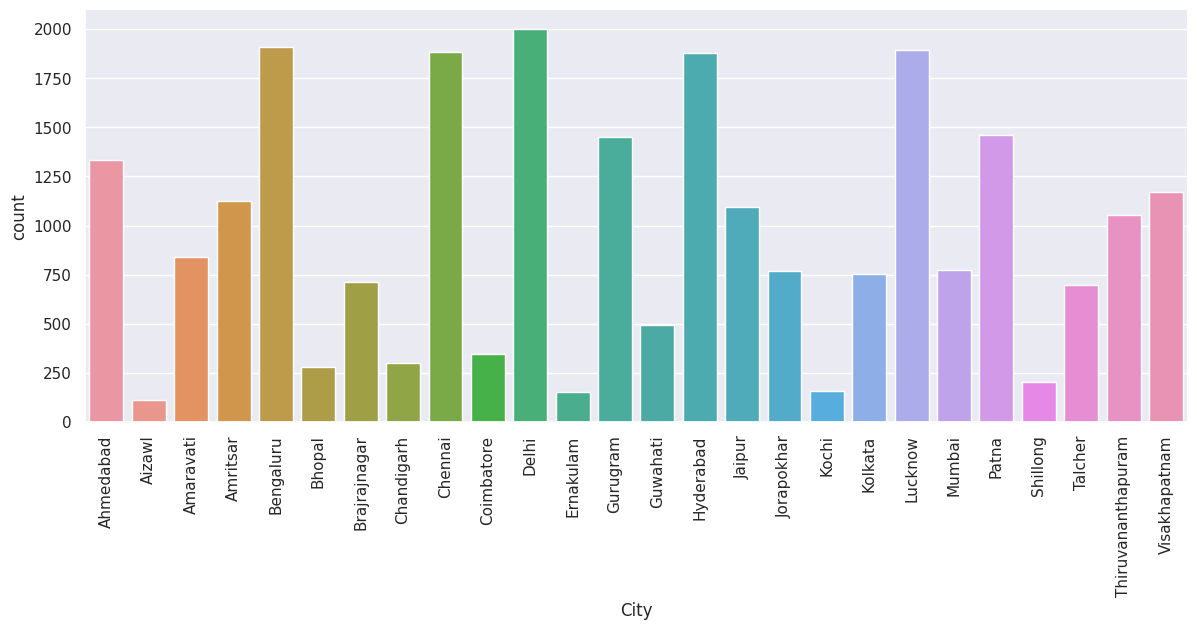

In [22]:
sns.set_theme(style='darkgrid')
graph = sns.catplot(x='City',kind='count',data=df,height =5,aspect = 2.5)
graph.set_xticklabels(rotation=90)

Text(0.5, 1.0, 'Catplot of AQI_Bucket')

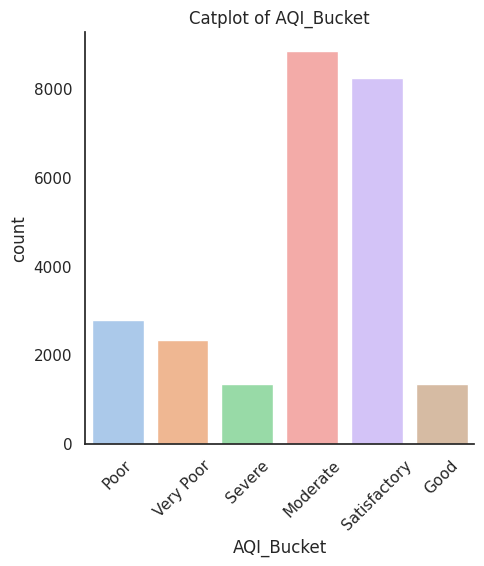

In [23]:

sns.set_theme(style='white')
graph =sns.catplot(x='AQI_Bucket',kind='count',data=df,palette='pastel')
graph.set_xticklabels(rotation=45)
plt.title('Catplot of AQI_Bucket')


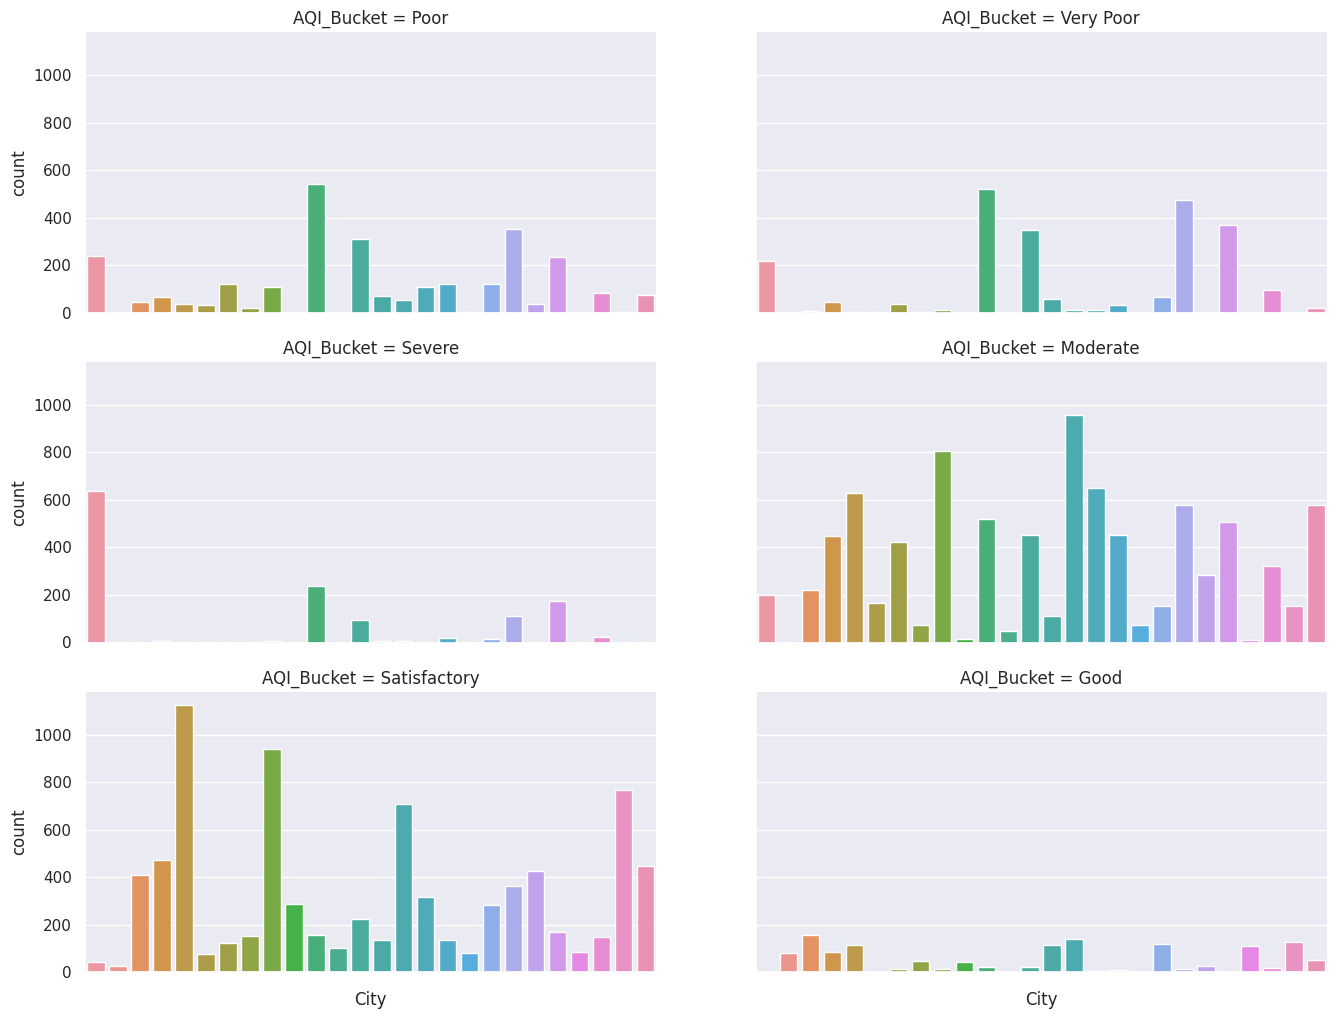

In [24]:
sns.set_theme(style='darkgrid')
graph = sns.catplot(x='City',kind='count',data=df,col = 'AQI_Bucket',col_wrap=2,height=3.5,aspect=2)
graph.set_xticklabels(rotation=90)

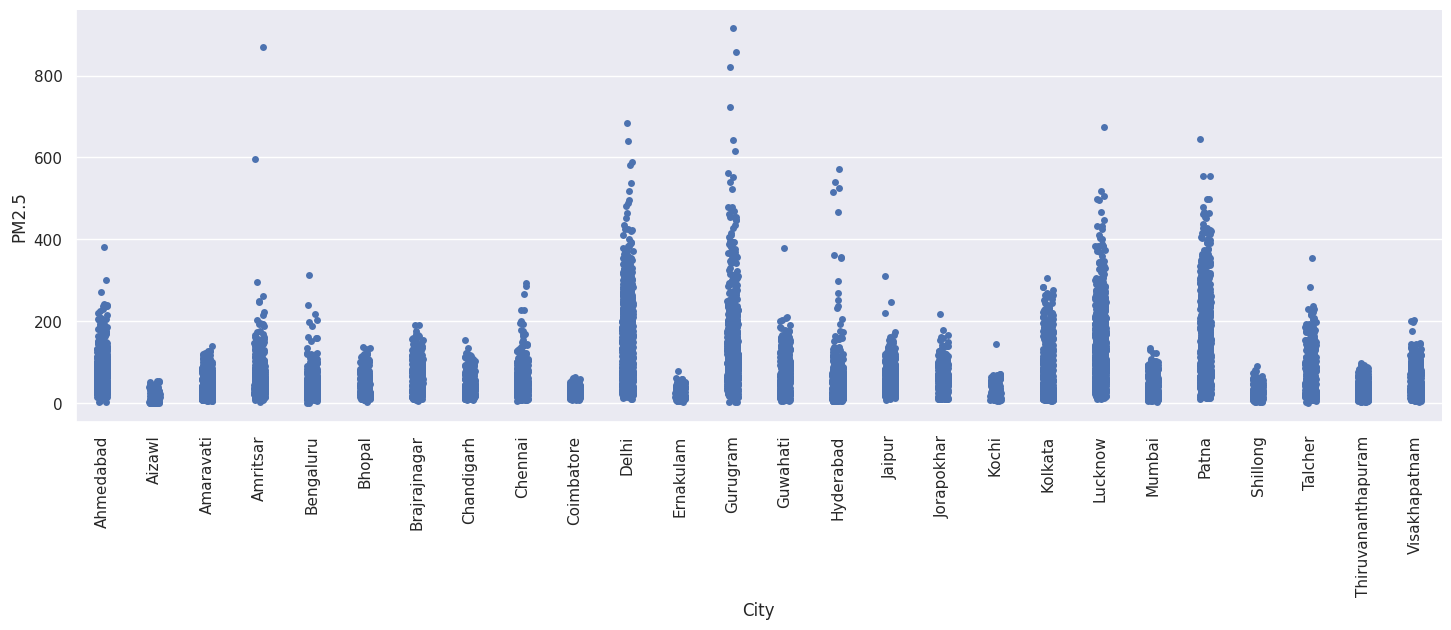

In [25]:
g1 =sns.catplot(x='City',y = 'PM2.5',data=df,height=5,aspect=3)
g1.set_xticklabels(rotation=90)

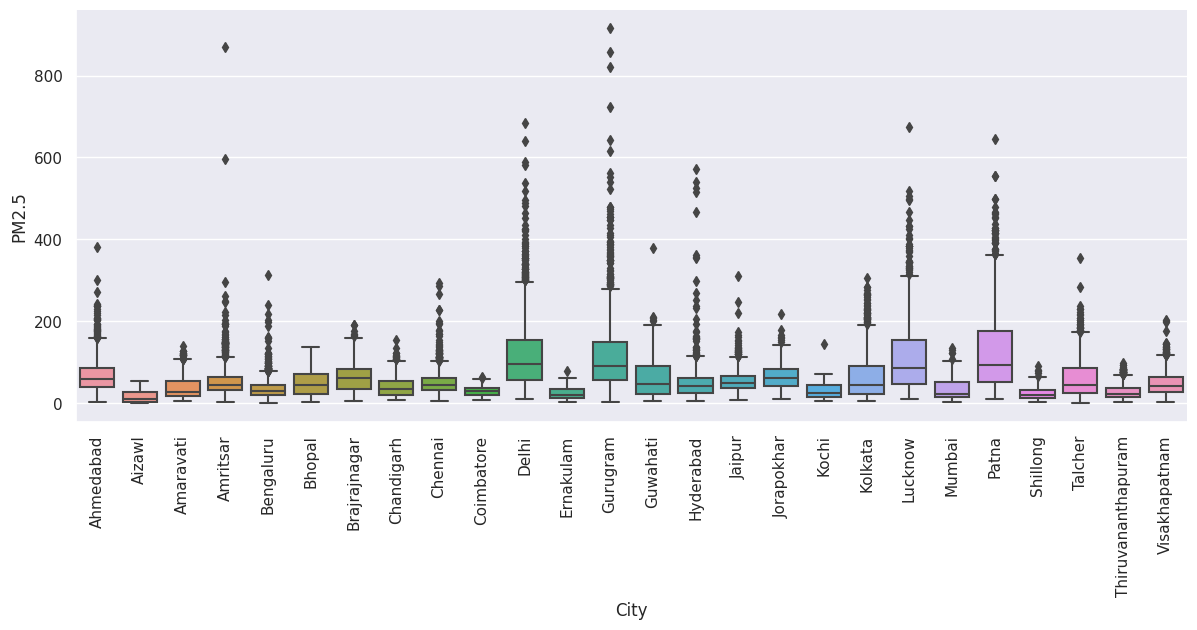

In [26]:
g1 =sns.catplot(x='City',y = 'PM2.5',kind='box',data=df,height=5,aspect=2.5)
g1.set_xticklabels(rotation=90)

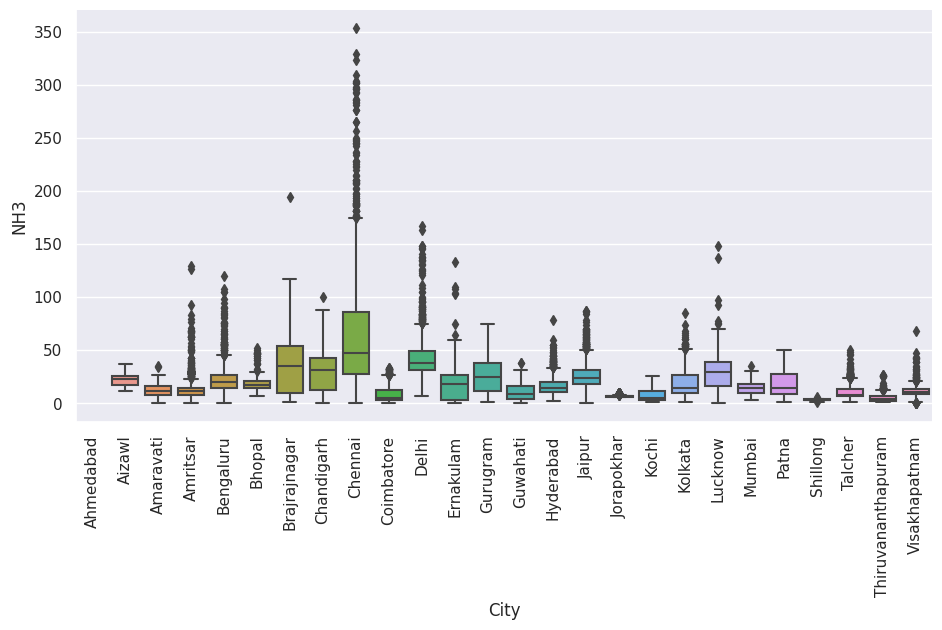

In [27]:
g2 = sns.catplot(x='City',y='NH3',data=df,kind = 'box',height=5,aspect=2)
g2.set_xticklabels(rotation=90)

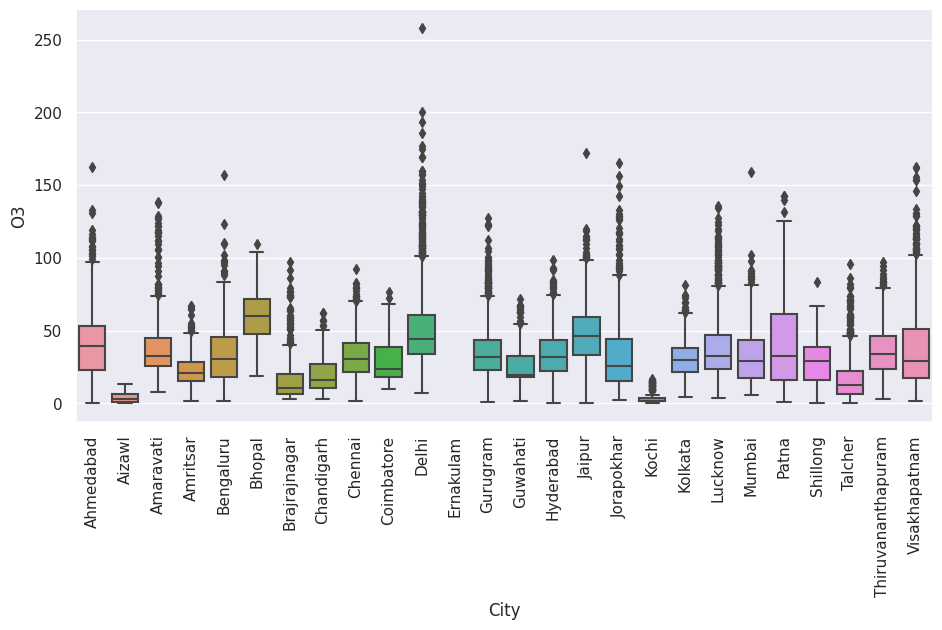

In [28]:
g3= sns.catplot(x='City',y ='O3',data=df,kind='box',height=5,aspect = 2)
g3.set_xticklabels(rotation=90)

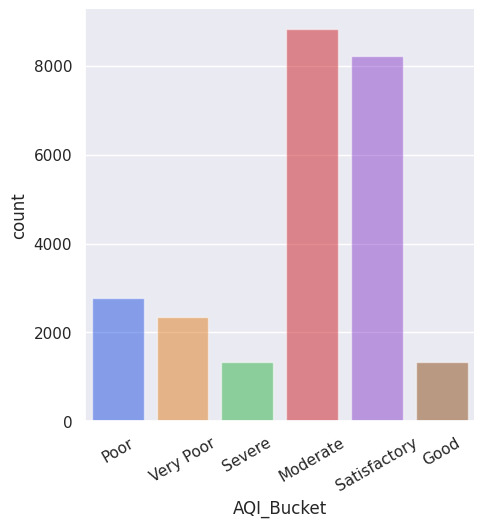

In [29]:
g4 =sns.catplot(x='AQI_Bucket',kind='count',data=df,palette='bright',alpha=0.5)
g4.set_xticklabels(rotation=30)

In [30]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [31]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

### Replacing the NAN value with it's mean value

In [32]:
df= df.replace({
    'Xylene':{np.nan:3.588683},
    'PM10':{np.nan:7086},
    'NH3':{np.nan:23.848366},
    'Toluene':{np.nan:9.525714},
    'Benzene':{np.nan:3.458668},
    'NOx':{np.nan:32.289012},
    'O3':{np.nan:34.912885},
    'PM2.5':{np.nan:67.476613},
    'SO2':{np.nan:14.362933},
    'CO':{np.nan:2.345267},
    'NO2':{np.nan:28.978391},
    'NO':{np.nan:17.622421},
})

In [33]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

###  Deleting the 'AQI_Bucket' Column as it not needed

In [34]:
df = df.drop(['AQI_Bucket'],axis=1)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,7086.0,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,7086.0,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,7086.0,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,7086.0,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,7086.0,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


### Identifying the Outlier by Using the Box Plot

<Axes: >

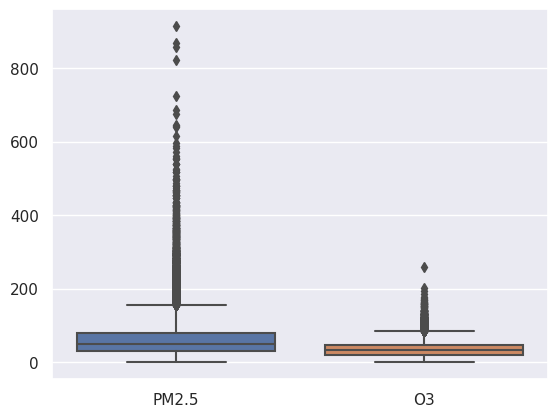

In [35]:
sns.boxplot(data=df[['PM2.5','O3']])

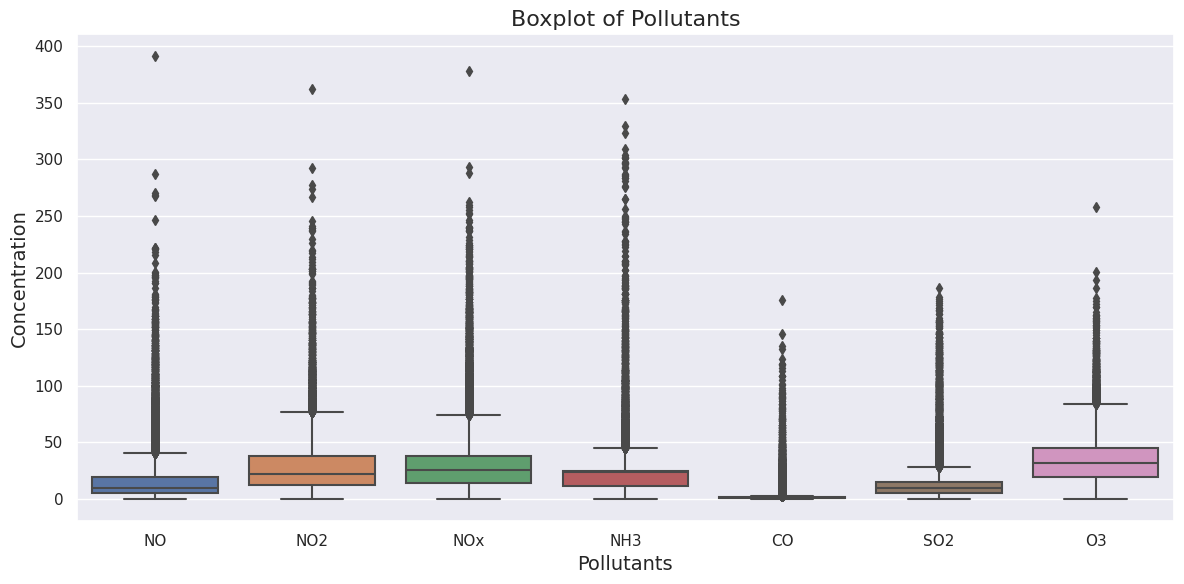

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']])  

plt.title('Boxplot of Pollutants', fontsize=16)  
plt.xlabel('Pollutants', fontsize=14)  
plt.ylabel('Concentration', fontsize=14)  


sns.set(style="darkgrid") 
plt.tight_layout()
plt.show()  

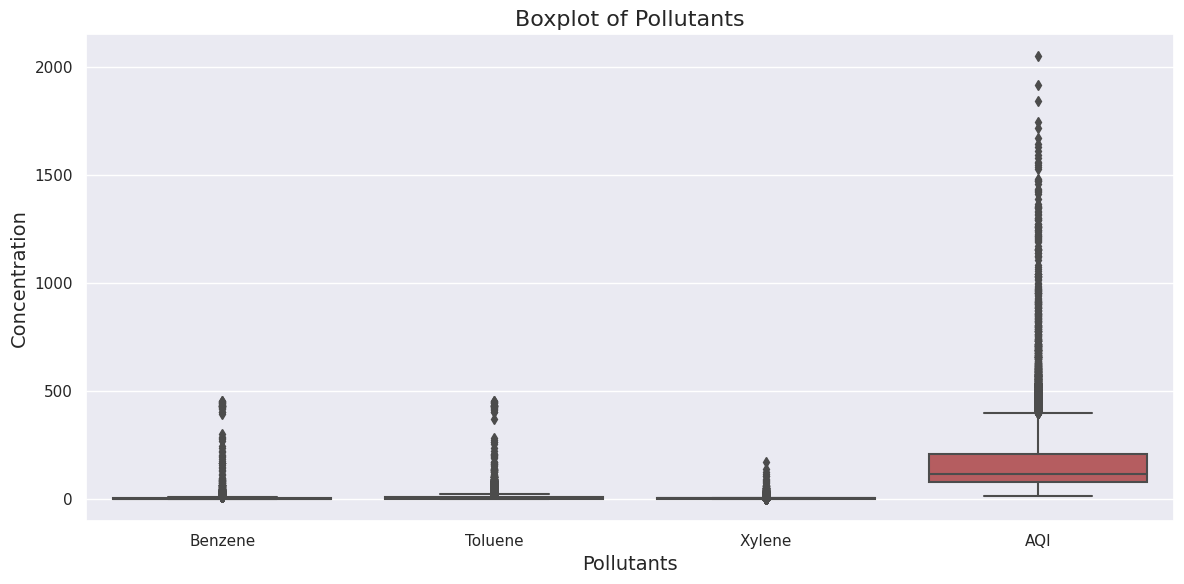

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Benzene','Toluene','Xylene','AQI']])  

plt.title('Boxplot of Pollutants', fontsize=16)  
plt.xlabel('Pollutants', fontsize=14)  
plt.ylabel('Concentration', fontsize=14)  


sns.set(style="darkgrid") 
plt.tight_layout()
plt.show()  

<Axes: >

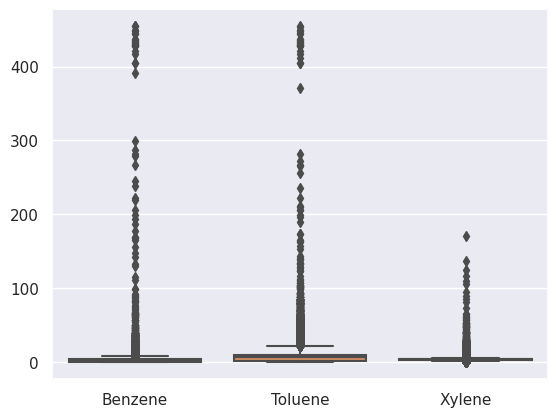

In [38]:
sns.boxplot(data =df[['Benzene','Toluene','Xylene']])

# IQR Method

In [39]:
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        IQR = q3-q1
        lb=q1-1.5*IQR
        ub=q3+1.5*IQR
        df[column]=df[column].apply(
            lambda x: q1 if x<lb else (q3 if x>ub else x)
        )
    return df
    

In [40]:
df = replace_outliers(df)

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,2105.256362,3146.724294,0.03,71.78,135.595000,7086.000000,7086.00
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.334743,5.680901,0.01,5.79,9.430000,14.890000,28.52
O3,24850.0,33.177781,17.487724,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

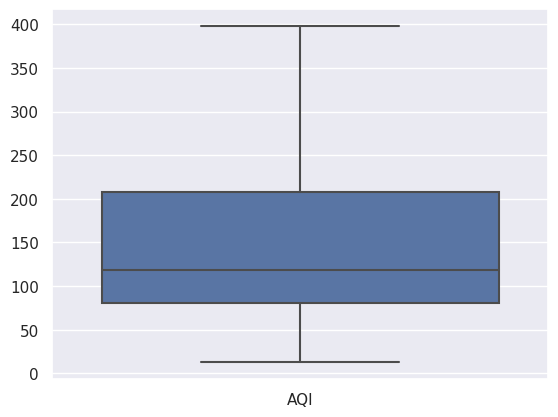

In [42]:
sns.boxplot(data =df[['AQI']])

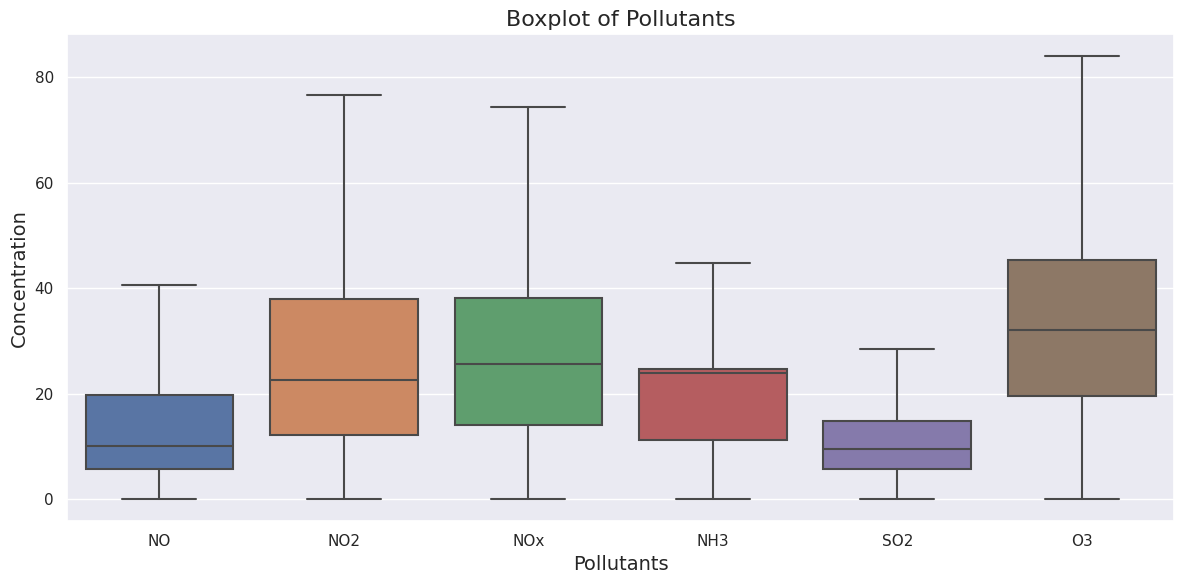

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3', 'SO2', 'O3']])  

plt.title('Boxplot of Pollutants', fontsize=16)  
plt.xlabel('Pollutants', fontsize=14)  
plt.ylabel('Concentration', fontsize=14)  


sns.set(style="darkgrid") 
plt.tight_layout()
plt.show()  

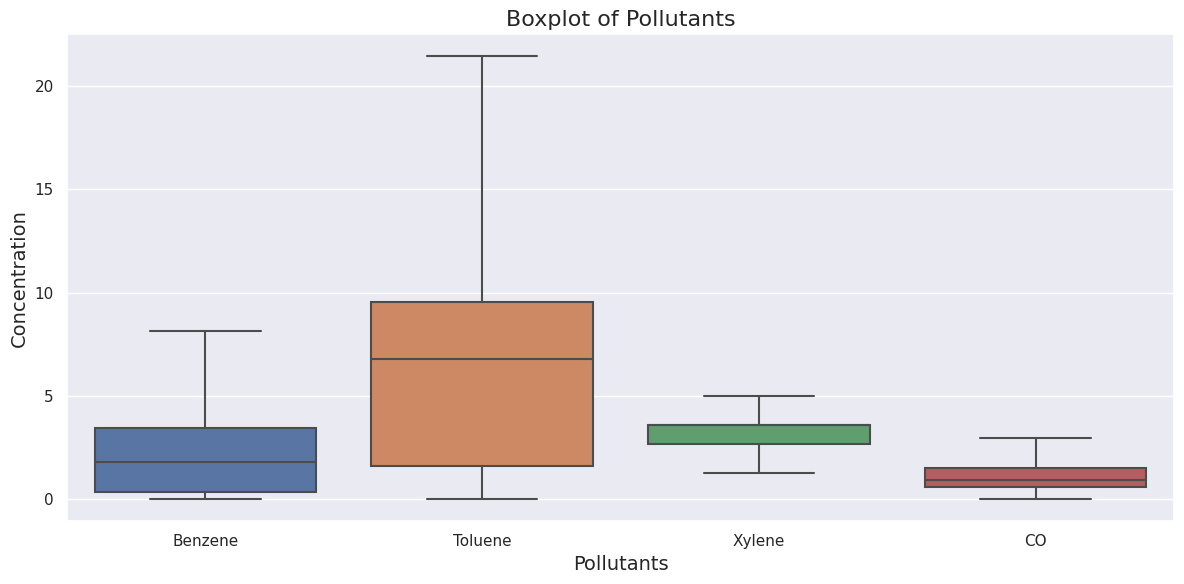

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Benzene','Toluene','Xylene','CO']])  

plt.title('Boxplot of Pollutants', fontsize=16)  
plt.xlabel('Pollutants', fontsize=14)  
plt.ylabel('Concentration', fontsize=14)  


sns.set(style="darkgrid") 
plt.tight_layout()
plt.show()  

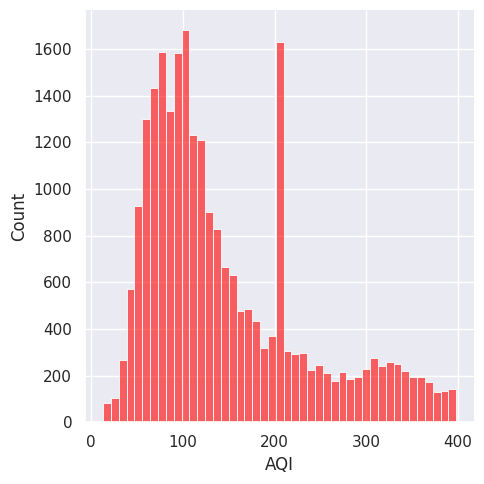

In [45]:
sns.displot(df, x= 'AQI',color='red',alpha = 0.6)
plt.show()

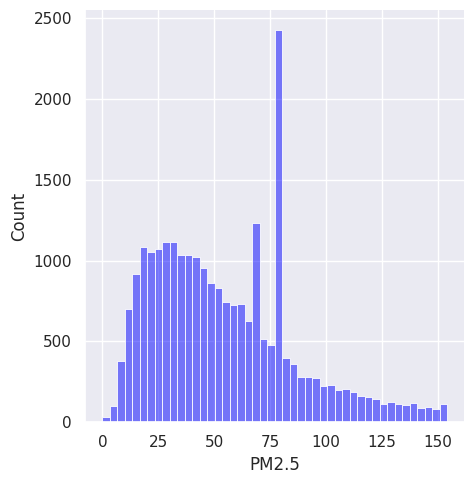

In [46]:
sns.displot(df,x='PM2.5',color ='blue',alpha =0.5)
plt.show()


In [47]:
df.head(4)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,7086.0,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,Ahmedabad,2015-01-30,79.84,7086.0,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,Ahmedabad,2015-01-31,94.52,7086.0,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,Ahmedabad,2015-02-01,135.99,7086.0,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0


In [48]:
df1 = df.drop(columns=['City','Date'])

In [49]:
df1.head(4)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.13,7086.0,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.84,7086.0,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.52,7086.0,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.99,7086.0,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0


# Multivariate Analysis 

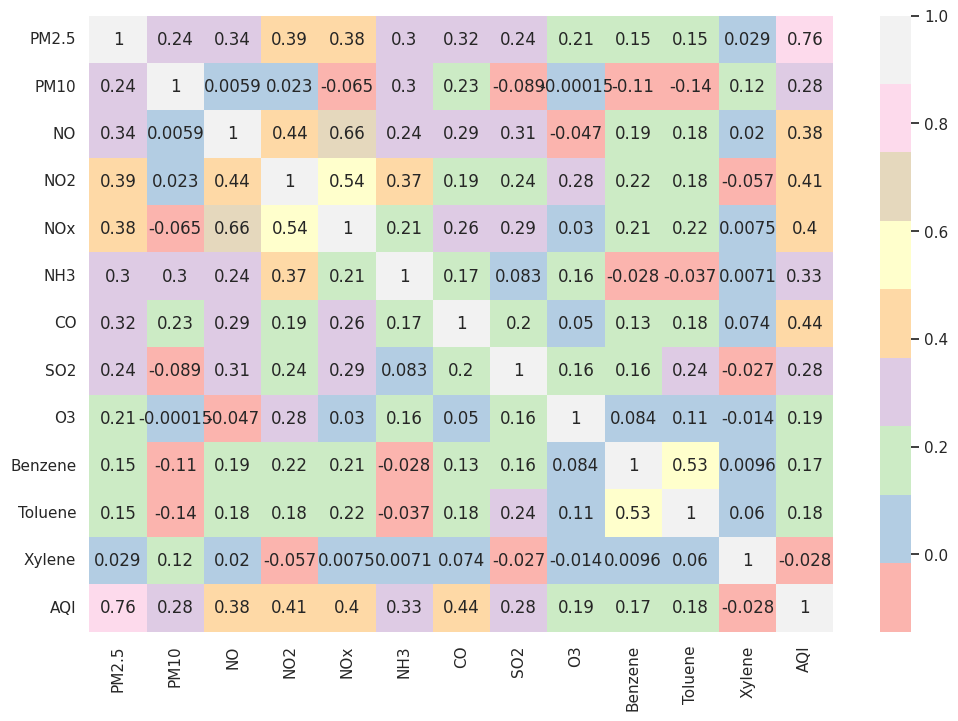

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap='Pastel1')
plt.show()

# WEEK 3

In [51]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,7086.0,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,7086.0,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,7086.0,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,7086.0,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,7086.0,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


# Scaling
### using Standard Scarler

In [52]:
df2 = StandardScaler().fit_transform(df1)
df2

array([[ 0.87831149,  1.58286631, -0.63658947, ..., -1.32511601,
        -0.29450027,  0.70999757],
       [ 0.77494642,  1.58286631,  0.15319907, ..., -1.32511601,
         2.69513707,  2.07124258],
       [ 1.23616198,  1.58286631,  1.35614288, ..., -1.32298652,
         0.50873294,  0.69855854],
       ...,
       [-1.01367767, -0.64815574, -1.03376636, ..., -1.32298652,
        -1.17169925, -0.90290618],
       [-1.21066824, -0.65316422, -0.96528759, ..., -1.32511601,
        -1.17169925, -1.06305265],
       [-1.26219369, -0.64806993, -1.3818668 , ...,  0.70336955,
         0.50873294, -1.10880878]])

In [53]:
df3 = pd.DataFrame(df2, columns=df1.columns)    
df3.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,1.582866,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,1.582866,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,1.582866,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,1.582866,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,1.582866,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733,0.698559


# Modeling

#### ---Importing Required Libraries for Data Modeling---


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso  
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
df3.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [56]:
#Independent Columns as X
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
#Dependent Column as Y
Y = df['AQI']

In [57]:
X.head(3)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.13,7086.0,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000
29,79.84,7086.0,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000
30,94.52,7086.0,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683


In [58]:
Y.head(3)

28    209.0
29    328.0
30    208.0
Name: AQI, dtype: float64

# Spliting the Data into Traing and Testing

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state=42)

print('--Traing Data Size is: 80%\n--Testing Data Size is 20%\n')
print('Size of X_train data is-',X_train.shape)
print('Size of X_Test data is- ',X_test.shape)
print('Size of Y_train data is-',Y_train.shape)
print('Size of Y_test data is',Y_test.shape)

--Traing Data Size is: 80%
--Testing Data Size is 20%

Size of X_train data is- (19880, 12)
Size of X_Test data is-  (4970, 12)
Size of Y_train data is- (19880,)
Size of Y_test data is (4970,)


# Modeling Using Linear Regression 

In [60]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

### Predicting the Value

In [61]:
#Predicting the Training Data
train_pred = LR.predict(X_train)

#Predicting the Testing Data
test_pred = LR.predict(X_test)

### Checking the RMSE & R^2 value of Training and Testing Data

In [62]:
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print('RMSE of Training Data is: ',str(RMSE_train))
print('RMSE of Testing Data is: ',str(RMSE_test))

print('_'*50)

print('\nR^2 Value of Training Data is: ',LR.score(X_train,Y_train))
print('R^2 Value og Testing Data is: ',LR.score(X_test, Y_test))

RMSE of Training Data is:  51.26069614176103
RMSE of Testing Data is:  50.473962996209835
__________________________________________________

R^2 Value of Training Data is:  0.6574011987541706
R^2 Value og Testing Data is:  0.6617374928824264


# Modeling using KNN

In [63]:
knn = KNeighborsRegressor()
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [64]:
#Predicting the Training Data
train_pred = knn.predict(X_train)

#Predicting the Testing Data
test_pred = knn.predict(X_test)


RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print('RMSE of Training Data is: ',str(RMSE_train))
print('RMSE of Testing Data is: ',str(RMSE_test))

print('_'*50)

print('\nR^2 Value of Training Data is: ',knn.score(X_train,Y_train))
print('R^2 Value og Testing Data is: ',knn.score(X_test, Y_test))

RMSE of Training Data is:  33.781862372464204
RMSE of Testing Data is:  41.95874739428459
__________________________________________________

R^2 Value of Training Data is:  0.851206480676468
R^2 Value og Testing Data is:  0.766243291888647


# Modeling using Decision Tree

In [65]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [66]:
#Predicting the Training Data
train_pred = dt.predict(X_train)

#Predicting the Testing Data
test_pred = dt.predict(X_test)


RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print('RMSE of Training Data is: ',str(RMSE_train))
print('RMSE of Testing Data is: ',str(RMSE_test))

print('_'*50)

print('\nR^2 Value of Training Data is: ',dt.score(X_train,Y_train))
print('R^2 Value og Testing Data is: ',dt.score(X_test, Y_test))

RMSE of Training Data is:  2.268421156308826
RMSE of Testing Data is:  47.366862558466835
__________________________________________________

R^2 Value of Training Data is:  0.9993290900734868
R^2 Value og Testing Data is:  0.7021015167318003


# Modeling Using Random Forest

In [67]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [68]:
#Predicting the Training Data
train_pred = rf.predict(X_train)

#Predicting the Testing Data
test_pred = rf.predict(X_test)

RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print('RMSE of Training Data is: ',str(RMSE_train))
print('RMSE of Testing Data is: ',str(RMSE_test))

print('_'*50)

print('\nR^2 Value of Training Data is: ',rf.score(X_train,Y_train))
print('R^2 Value og Testing Data is: ',rf.score(X_test, Y_test))

RMSE of Training Data is:  12.754664094008408
RMSE of Testing Data is:  33.35116003269581
__________________________________________________

R^2 Value of Training Data is:  0.9787893054155422
R^2 Value og Testing Data is:  0.8523134511204026


# Modeling Using Ridge Regression 

In [71]:
ridge = Ridge()    
ridge.fit(X_train, Y_train)  

Ridge()

In [74]:
# Predicting the Training Data  
train_pred = ridge.predict(X_train)  

# Predicting the Testing Data  
test_pred = ridge.predict(X_test)  

# Calculating RMSE  
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))  
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))  

# Print RMSE Values  
print('RMSE of Training Data is: ', RMSE_train)  
print('RMSE of Testing Data is: ', RMSE_test)  
print('_' * 50)  

# Print R² Values  
print('\nR² Value of Training Data is: ', ridge.score(X_train, Y_train))  
print('R² Value of Testing Data is: ', ridge.score(X_test, Y_test))  

RMSE of Training Data is:  51.26069619924305
RMSE of Testing Data is:  50.473985962044026
__________________________________________________

R² Value of Training Data is:  0.657401197985813
R² Value of Testing Data is:  0.6617371850610485


# Modeling Using Lasso Regression

In [72]:
lasso = Lasso()  
lasso.fit(X_train, Y_train)  

Lasso()

In [73]:
# Predicting the Training Data  
train_pred = lasso.predict(X_train)  

# Predicting the Testing Data  
test_pred = lasso.predict(X_test)  

# Calculating RMSE  
RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))  
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))  

# Print RMSE Values  
print('RMSE of Training Data is: ', RMSE_train)  
print('RMSE of Testing Data is: ', RMSE_test)  
print('_' * 50)  

# Print R² Values  
print('\nR² Value of Training Data is: ', lasso.score(X_train, Y_train))  
print('R² Value of Testing Data is: ', lasso.score(X_test, Y_test))  

RMSE of Training Data is:  51.32856199821303
RMSE of Testing Data is:  50.57525519466364
__________________________________________________

R² Value of Training Data is:  0.6564934408003624
R² Value of Testing Data is:  0.6603784661221289
